# SVM Classifier for non-linearly separable data

In [ ]:
# Import usual libraries
import numpy as np
import matplotlib.pyplot as plt

# Make all figures tiny for readability purpose
from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

## 1. Let's build our "XOR" dataset

Let's try to classify a non-linearly separable dataset like this one

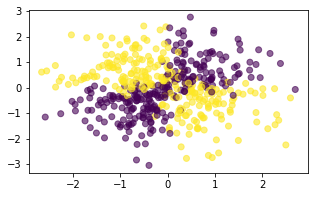

To that end, we will create a 2D dataset using [logical XOR gates](https://en.wikipedia.org/wiki/XOR_gate)

Try to understand how this works by playing with `np.logical_xor` in the cells below:

In [ ]:
print(np.logical_xor(True, True))
print(np.logical_xor(True, False))
print(np.logical_xor(False, False))

False
True
False


In [ ]:
np.logical_xor([True, True, False], [True, False, False])

array([False,  True, False])

Let's now create our own synthetic 2D dataset where: 

$$ y = 
\begin{cases}
    1 & \text{if } (X_1>0 \textbf{ xor } X_2>0) \\
    0 & \text{otherwise}
\end{cases}
$$


In [ ]:
# Number of datapoints
n = 500
noise = 0.2

Text(0, 0.5, 'X2')

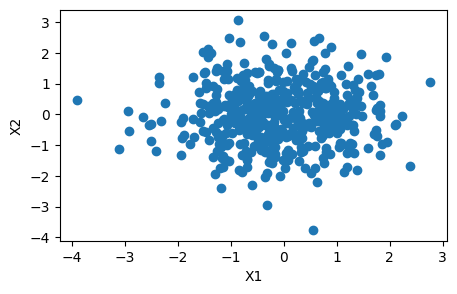

In [ ]:
rng = np.random.default_rng(0)
X = rng.standard_normal((n, 2))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("X1")
plt.ylabel("X2")


In [ ]:
print(X.shape)
x1 = X[:, 0]
x2 = X[:, 1]

(500, 2)


In [ ]:
# Then, build our binary class y
# where y=1 if and only if (X1 > ε xor X2 > ε)
# epsilon ε not exactly zero to simulate "noise"

epsilon = noise * rng.standard_normal(n)

y_bool = np.logical_xor(
    x1 > epsilon,
    x2 > epsilon
)
y = np.where(y_bool, 1, 0)

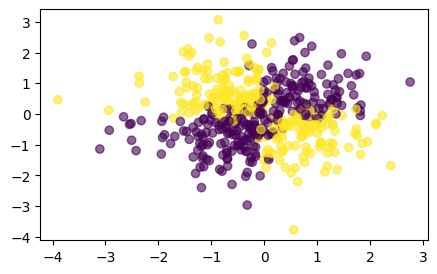

In [ ]:
# We have re-created the XOR quadrant!
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
plt.show()

## 2 - Linear SVM

Welcome _Support Vector Machine (SVM)_ 🎉

Linear SVM classifier's goal is to find the best vector **w**

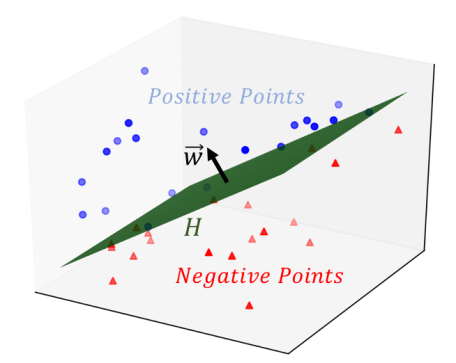

- whose direction uniquely determines the decision boundary hyperplane
- and minimizes the sum of hinge losses for outliers

👉 **w** contains all model parameters learned during `.fit()`  
👉 `C` is the **cost** associated with the **wrong** classification

___
❓ Fit a **linear** SVC classifier on the whole dataset with the value `C` = 1. 

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1)
# Train the classifier
svm.fit(X, y)

SVC(C=1, kernel='linear')

❓ Visualize the decision boundaries of your model using the `plot_decision_regions` function given to you in `utils/plots.py`

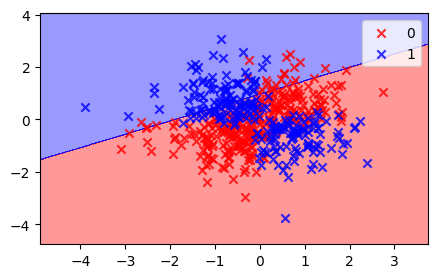

In [ ]:
from utils.plots import plot_decision_regions

plot_decision_regions(X, y, classifier=svm)

❓Save below your "guesstimated" accuracy score for this model (roughly) 

In [ ]:
#linear_svm_score = ?

In [ ]:
linear_svm_score = 0.5

❓ Do you think the value of `C` has any importance in this case?

<details><summary>Answer</summary>
    
☝️ Linear SVM classifiers always separate data points with a straight line, no matter the cost, `c`, being applied to wrongly classified data points. We are structurally trying to fit the wrong type of model to the dataset.

</details>

❓ Do you think a Logistic Regression would perform better? Feel free to try.

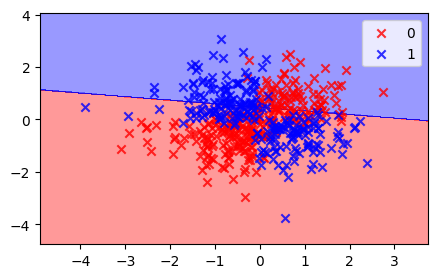

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
plot_decision_regions(X, y, classifier=logreg)

## 3. Kernel SVM 🔥

📚 First, **read section 5 (Kernels) of today's lecture carefully**. Take your time, it is part of the challenge

❓In your own words, what is a Kernel in one sentence?

<details>
    <summary>A possible answer</summary>

It is a measure of "similarity" between points, which is used to classify points in SVM models (two points with large similarity would be classified similarly)
</details>

❓Cite below 4 different kernel by their names

<details>
    <summary>A possible answer</summary>

- Linear
- Polynomial
- Radial Basis Fonction (rbf)
- Sigmoid
</details>

## 3.2 Polynomial Kernels

A polynomial kernel of degree 2 is as follows 
    $$K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^2$$

By changing the kernel, we have changed our notion of _similarity_: instead of measuring similarity by how close the points are in terms of dot product ("cosine similarity") for the linear kernel, we are measuring similarity based on **whether points are within a circle to each other or not.** 

This is **equivalent** to creating the new quadratic features as below (Kernel Trick)
    $$\phi(x) = \begin{bmatrix} x_1^2 \\ x_1 x_2 \\ x_2 x_1 \\ x_2^2 \\  \sqrt{2c} \ x_1 \\ \sqrt{2c} \ x_2\end{bmatrix}$$

❓ Intuitively speaking, what do you think is the minimum number of kernel "degrees" `d` we need to best fit our XOR dataset? 

<details>
    <summary>Answer</summary>

`d=2` should be enough because our XOR condition can be computed from polynom `x1 * x2`
    
$$    
    class = 
\begin{cases}
    0 & \text{if } x_1 x_2 > 0\\
    1 & \text{otherwise}
\end{cases}
$$
</details>


❓ Fit and plot a SVM `poly` of degree 2, keeping `C = 100` large enough so as to visualize the "maximum margin classifier"

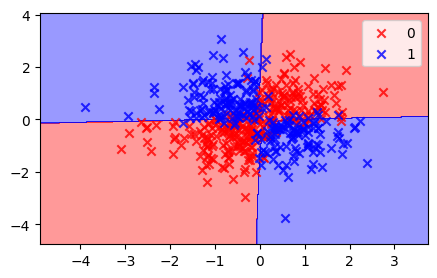

In [ ]:
svm = SVC(kernel='poly', degree=2, C=100)
svm.fit(X, y)
plot_decision_regions(X, y, classifier=svm)

❓ Given that you know how this XOR dataset has been engineered, which adjectives best describe your svm's performance?

In [ ]:
a = "is underfitting"
b = "captures all reducible error"
c = "has too high variance"
d = "has only irreducible errors left"

poly_svm_performance = None # [?] # fill the list with the answer(s)
poly_svm_performance = [b, d]

❓ Still not convinced? You can double-check that the polynomial kernel is equivalent to having access to polynomial features by fitting this model below:

- We create polynomial features as a first step (feature engineering)
- and then fit a linear SVM.

(And don't worry about the syntax of pipelines, we will see more on pipelines in the next lecture! 🔥)

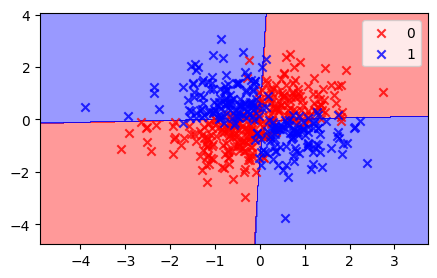

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Choose your degree
degree = None
degree = 2
equivalent_polynomial_model = make_pipeline(
    (PolynomialFeatures(degree=degree)),  # First, create all polynomial combinations of your features
    (SVC(kernel="linear", C=100))  # Then, fit a linear SVM
)
equivalent_polynomial_model.fit(X, y)
plot_decision_regions(X, y, classifier=equivalent_polynomial_model)

☝️ Although mathematically equivalent, this manual feature engineering requires much more computational power than the kernel trick, and will not scale with higher dimensionality!

### Moons dataset

Let's now try with a harder dataset to classifiy!

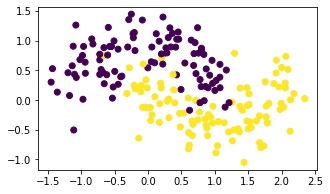

In [ ]:
from sklearn.datasets import make_moons

n=200
X,y = make_moons(n_samples=n, noise=0.25, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y);

❓ Try to fit a polynomial SVM kernel to this dataset 

Try it out **visually** below by changing the values of `C` and `degree` and `coef0`.

`coef0` plays the role of $c$ in $K(\textbf{a},\textbf{b}) = (\textbf{a}^T\textbf{b} + c )^d$
- When equal to 0, you only have access to the d-th degree polynomial features
- The higher it is, the more your model will consider lower degree features

In [ ]:
from ipywidgets import interact # pip install ipywidgets if you haven't done it already

@interact(C=[1, 10, 1000, 10000, 100000], degree=[1,2,3,4,5,6,7,8,9], coef0=[0,0.5,1,2,5,10,100])
def svc(C, degree, coef0):
    svm = SVC(kernel='poly', C=C, coef0=coef0, degree=degree)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', options=(1, 10, 1000, 10000, 100000), value=1), Dropdown(descr…

☝️ A polynomial kernel can fit pretty much anything as long as the degree is high enough.  

However, be aware that polynomial kernels with too high a degree will make models prone to overfitting!


## 3.3 RBF - Radial Basis Function Kernel (aka gaussian)

Here comes the RBF Kernel! 
Pretty much the go-to kernel for SVM (and default one in sklearn).   

It proves very robust to a variety of problems, and is easier to fine-tune than polynomial, as it only requires gridsearching its kernel hyper-parameter `gamma` $\gamma$, on top of `C` of course

$K(\textbf{a},\textbf{b}) = \exp[ \left( - \gamma ||\textbf{a}-\textbf{b}||^2\right)$

- The larger the euclidian distance between two points $||\textbf{a}-\textbf{b}||^2$, the closer the kernel function is to zero. This means that two points far away are more likely to be different.

- `gamma` $\gamma$ reduces each instance’s range of influence on the others (**myopia**). Stronger $\gamma$ values will make your model overfit by looking "too closely" at small-scale irregularities

- `C` still controls the **hardness** of the margin. Stronger values will make your model overfit.

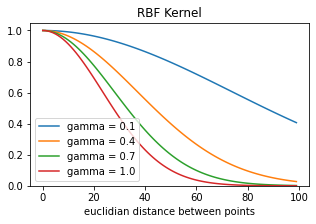

In [ ]:
# Let's show below the impact of gamma "myopia" in the Kernel
for gamma in np.linspace(0.1, 1, 4):
    plt.plot(np.exp(-gamma*np.linspace(0, 3, 100)**2),
             label=f'gamma = {gamma}')
plt.ylim(0,)
plt.title('RBF Kernel')
plt.xlabel('euclidian distance between points')
plt.legend();

❓ Fit and plot decision regions of an SVM classifier with an RBF kernel

- Start with a model with very low variance (ex: `gamma=0.01` and `C=0.1`)
- Increase `gamma` until you observe obvious overfitting. It should be clearly visible on the graph. 

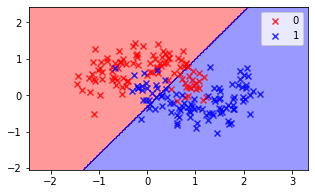

In [ ]:
svm = SVC(kernel='rbf', gamma=0.01, C=0.1).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

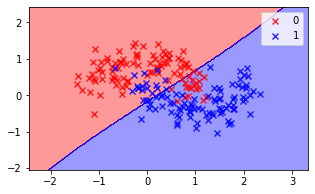

In [ ]:
svm = SVC(kernel='rbf', gamma=0.1, C=0.1).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

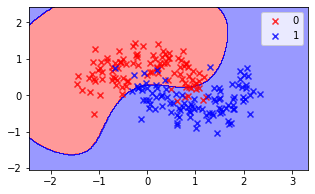

In [ ]:
svm = SVC(kernel='rbf', gamma=1, C=0.1).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

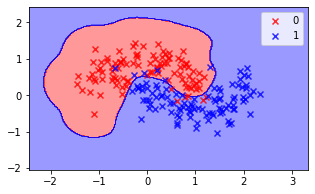

In [ ]:
svm = SVC(kernel='rbf', gamma=10, C=0.1).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

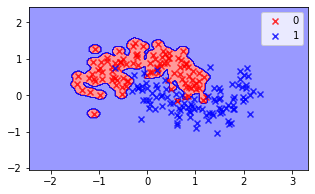

In [ ]:
svm = SVC(kernel='rbf', gamma=100, C=0.1).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

❓ Now, use you best estimated value of gamma (for instance `gamma=1`), and increase `C` this time until you overfit


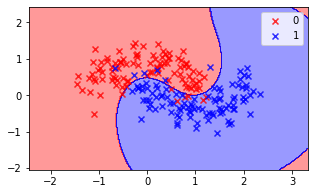

In [ ]:
svm = SVC(kernel='rbf', gamma=1, C=1).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

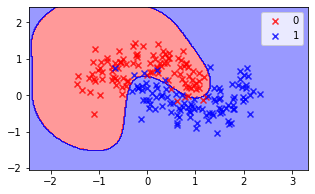

In [ ]:
svm = SVC(kernel='rbf', gamma=1, C=10).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

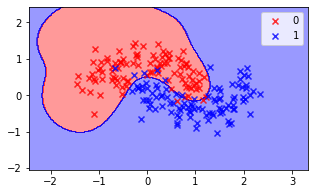

In [ ]:
svm = SVC(kernel='rbf', gamma=1, C=100).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

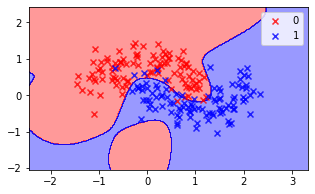

In [ ]:
svm = SVC(kernel='rbf', gamma=1, C=1000).fit(X, y)
plot_decision_regions(X, y, classifier=svm)

☝️ Feel free to create your own interactive plot using `@interact` as above and try to "visually" find the best `C` and `gamma`

In [ ]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10])
def svc(C=1, gamma=1):
    svm = SVC(kernel='rbf', gamma=gamma, C=C)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=1, options=(0.1, 1, 10, 100, 1000, 10000), value=1), Dro…

❓Store below your best visual guess for `C` and `gamma` (rounded to powers of ten: 0.1, 1, 10, 100 ...)

In [ ]:
best_c = None #?
best_gamma = None #? 

In [ ]:
best_c = 1
best_gamma = 1 

## 3.4 Sigmoid kernel

$K(\textbf{a},\textbf{b}) = tanh(\gamma \textbf{a}^T \textbf{b} +r)$

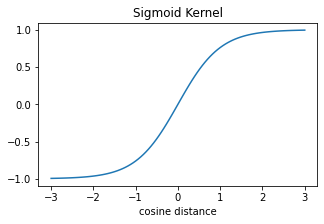

In [ ]:
# The "tangent hyperbolic" function resembles sigmoid but can take negative values
x = np.linspace(-3,3,100)
plt.plot(x, np.tanh(x))
plt.xlabel('cosine distance'); plt.title('Sigmoid Kernel');

☝️ The Sigmoid kernel compresses the "cosine similarity" used in the linear kernel into a [-$\gamma$,+$\gamma$] interval.

❓ Try to **visually** fine tune your model with the sigmoid kernel, doing a coarse grain search for 
- `C=[0.1, 1, 10, 100, 1000, 10000]` 
- `gamma = [0.001, 0.01, 0.1, 1, 10]`  

using the `@interact` decorator combined with the `plot_decision_regions` function

In [ ]:
@interact(C=[0.1, 1, 10, 100, 1000, 10000], gamma = [0.001, 0.01, 0.1, 1, 10], coef0=0.)
def svc(C=1000, gamma=0.1, coef0=0):
    svm = SVC(kernel='sigmoid', gamma=gamma, C=C, coef0=coef0)
    svm.fit(X, y)
    plot_decision_regions(X, y, classifier=svm)

interactive(children=(Dropdown(description='C', index=4, options=(0.1, 1, 10, 100, 1000, 10000), value=1000), …

☝️  Not easy to make it work visually, right? Time for an automated GridSearch!

## 4. Grid Search the best kernel

❓ `RandomizedSearchCV` for the best `kernel`, and best kernel hyperparameters at the same time (warning: scikit-learn has issues when gridsearching polynomial kernels at the same time as others)
 
Use your visual intuitions above to define plausible ranges of values to try out

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

# Instanciate model
model = SVC()

# Hyperparameter search space
search_space = {
    'kernel': ['sigmoid', 'rbf'],
    'C': [0.01, 0.1, 1,10,100,1000],
    'gamma': [0,0.1,1,10,100],
    'coef0': [0,0.1,1],
}

# Instanciate Random Search
rsearch = RandomizedSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=3, n_iter=1000, verbose=0)


rsearch.fit(X,y)

/Users/brunolajoie/.pyenv/versions/3.8.12/envs/lewagon3812/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 180 is smaller than n_iter=1000. Running 180 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


CPU times: user 290 ms, sys: 96.5 ms, total: 387 ms
Wall time: 5.23 s


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=1000, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                        'coef0': [0, 0.1, 1],
                                        'gamma': [0, 0.1, 1, 10, 100],
                                        'kernel': ['sigmoid', 'rbf']},
                   scoring='accuracy')

In [ ]:
print(rsearch.best_params_)

{'kernel': 'rbf', 'gamma': 1, 'coef0': 0, 'C': 1}


❓ Plot your best model's decision boundaries

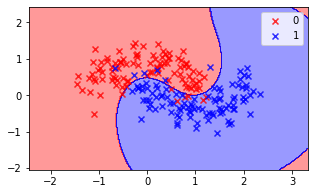

In [ ]:
best_svm = rsearch.best_estimator_.fit(X,y)
plot_decision_regions(X, y, classifier=best_svm)

❓ 5-fold cross-validate its accuracy and store your mean result as `best_svm_cv_accuracy`

In [ ]:
from sklearn.model_selection import cross_val_score
best_svm_cv_accuracy = cross_val_score(best_svm, X, y, cv=5).mean()
best_svm_cv_accuracy

0.9349999999999999

## 5. Generalization

❓Choose your `best_svm` model to put in "production" in your app on the cloud. Fit it on the half moon dataset.

In [ ]:
best_svm = best_svm

After a few days, the model has received and predicted new data points never having seen them before (our "test set")

In [ ]:
# Generate a half-moon test_set of size n_test
n_test = 100
X_test, y_test = make_moons(n_samples=n, noise=0.2, random_state=1)

X_full = np.vstack((X, X_test))
y_full = np.append(y, values = y_test)
test_idx = np.arange(n,n+n_test)

❓ Visualize its performance by doing `plot_decision_regions` including `test_idx` as optional argument.  
Count how many misclassified test samples you get!

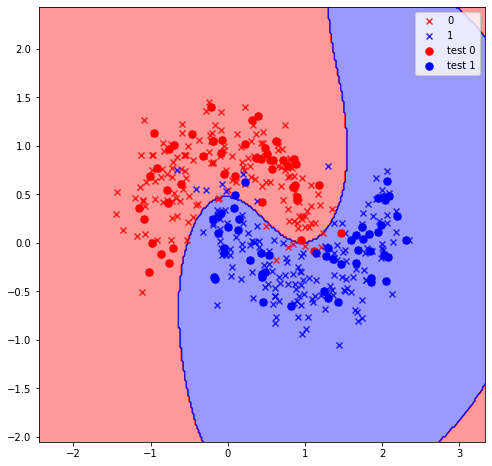

In [ ]:
plt.figure(figsize=(8,8))
plot_decision_regions(X_full, y_full, test_idx = test_idx, classifier = best_svm)
plt.legend();

In [ ]:
number_misclassified_test = None

In [ ]:
number_misclassified_test = 7

## 6. kNN vs. SVM ?

Such non-linear problem could also fit well on a KNN classifier.
Try to find the best K visually and compare its behavior to the SVM.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import ipywidgets as widgets ## add this import

@interact(k=widgets.IntSlider(min=1,max=15,step=1))
def knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    plot_decision_regions(X, y, classifier=knn)

interactive(children=(IntSlider(value=1, description='k', max=15, min=1), Output()), _dom_classes=('widget-int…